In [1]:
import os
import numpy as np
import pandas as pd
import mysql.connector
from mysql.connector import Error 

In [2]:
def get_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
def handle_missing_data(data):
    for column in data.columns:
        missing_count = data[column].isnull().sum()
        print(f"Missing Values in {column}: {missing_count}")
        if missing_count > 0:
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            print(f"No missing values in column: '{column}'")

In [4]:
def handle_duplicated_values(data):
    total_duplicated = data.duplicated().sum()
    print(f"Total duplicated rows: {total_duplicated}")
    if total_duplicated > 0:
        data.drop_duplicated(inplace = True)
        print(f"Duplicates removed. New shape: {data.shape}")
    else:
        print("No duplicated rows found")

In [5]:
customer_data = get_data(r'ShopEase Data\customers.csv')
print(customer_data.head())

   customer_id  customer_name                email   join_date
0            1  Alice Johnson    alice@example.com  2023-01-15
1            2      Bob Smith      bob@example.com  2023-02-20
2            3  Charlie Davis  charlie@example.com  2023-03-05
3            4      David Lee    david@example.com  2023-03-10
4            5     Eve Parker      eve@example.com  2023-04-01


In [6]:
handle_missing_data(customer_data)

Missing Values in customer_id: 0
No missing values in column: 'customer_id'
Missing Values in customer_name: 0
No missing values in column: 'customer_name'
Missing Values in email: 0
No missing values in column: 'email'
Missing Values in join_date: 0
No missing values in column: 'join_date'


In [7]:
customer_data['join_date'].dtype

dtype('O')

In [8]:
customer_data['join_date'] = pd.to_datetime(customer_data['join_date'])

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    50 non-null     int64         
 1   customer_name  50 non-null     object        
 2   email          50 non-null     object        
 3   join_date      50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ KB


In [10]:
handle_duplicated_values(customer_data)

Total duplicated rows: 0
No duplicated rows found


In [11]:
inventory_data = get_data(r'ShopEase Data\inventory.csv')
print(inventory_data.head())

     product_name  stock_quantity  stock_date    supplier warehouse_location
0           Sugar             162   11/3/2024  Supplier D        Warehouse 3
1          Tablet             243  10/30/2024  Supplier C        Warehouse 2
2           Jeans             223  10/24/2024  Supplier B        Warehouse 3
3  Women's Jacket             187   8/31/2024  Supplier E        Warehouse 3
4         Blender             101   11/6/2024  Supplier E        Warehouse 1


In [12]:
handle_missing_data(inventory_data)

Missing Values in product_name: 0
No missing values in column: 'product_name'
Missing Values in stock_quantity: 0
No missing values in column: 'stock_quantity'
Missing Values in stock_date: 0
No missing values in column: 'stock_date'
Missing Values in supplier: 0
No missing values in column: 'supplier'
Missing Values in warehouse_location: 0
No missing values in column: 'warehouse_location'


In [13]:
handle_duplicated_values(inventory_data)

Total duplicated rows: 0
No duplicated rows found


In [14]:
inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_name        200 non-null    object
 1   stock_quantity      200 non-null    int64 
 2   stock_date          200 non-null    object
 3   supplier            200 non-null    object
 4   warehouse_location  200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [15]:
inventory_data['stock_date'] = pd.to_datetime(inventory_data['stock_date'])


In [16]:
inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_name        200 non-null    object        
 1   stock_quantity      200 non-null    int64         
 2   stock_date          200 non-null    datetime64[ns]
 3   supplier            200 non-null    object        
 4   warehouse_location  200 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.9+ KB


In [17]:
order_items_data = get_data(r'ShopEase Data\order_items.csv')
print(order_items_data.head())

   order_detail_id  order_id  quantity  product_id
0                1         1         3          34
1                2         1         2          47
2                3         2         4          10
3                4         2         3          77
4                5         3         2          76


In [18]:
handle_missing_data(order_items_data)

Missing Values in order_detail_id: 0
No missing values in column: 'order_detail_id'
Missing Values in order_id: 0
No missing values in column: 'order_id'
Missing Values in quantity: 0
No missing values in column: 'quantity'
Missing Values in product_id: 0
No missing values in column: 'product_id'


In [19]:
handle_duplicated_values(order_items_data)

Total duplicated rows: 0
No duplicated rows found


In [20]:
orders_data = get_data(r'ShopEase Data\Orders.csv')
print(orders_data.head())

   order_id  Cutomer_id order_date  product_id  quantity
0         1          20  11/1/2024           3         2
1         2          36  11/1/2024           1         1
2         3           1  11/1/2024           8         3
3         4          36  11/2/2024           6         1
4         5          14  11/2/2024          12         2


In [21]:
orders_data.rename(columns={'Cutomer_id': 'customer_id'}, inplace=True)

In [22]:
handle_missing_data(orders_data)

Missing Values in order_id: 0
No missing values in column: 'order_id'
Missing Values in customer_id: 0
No missing values in column: 'customer_id'
Missing Values in order_date: 0
No missing values in column: 'order_date'
Missing Values in product_id: 0
No missing values in column: 'product_id'
Missing Values in quantity: 0
No missing values in column: 'quantity'


In [23]:
orders_data['order_date'] = pd.to_datetime(orders_data['order_date'])

In [24]:
handle_duplicated_values(orders_data)

Total duplicated rows: 0
No duplicated rows found


In [25]:
suppliers_data = get_data(r'ShopEase Data\suppliers_data.csv')
print(suppliers_data.head())

  supplier_name supplier_address                  email  contact_number  \
0    Supplier D      321 Pine St  supplierD@example.com      4567890123   
1    Supplier D      321 Pine St  supplierD@example.com      4567890123   
2    Supplier D      321 Pine St  supplierD@example.com      4567890123   
3    Supplier A      123 Main St  supplierA@example.com      1234567890   
4    Supplier D      321 Pine St  supplierD@example.com      4567890123   

          fax  account_number  order_history contract supplier_country  \
0  3987654318        44445555            468       No          Germany   
1  3987654318        44445555             61       No          Germany   
2  3987654318        44445555             88       No          Germany   
3   987654321        11112222            353      Yes              USA   
4  3987654318        44445555            547       No          Germany   

  supplier_city  country_code  
0        Berlin            49  
1        Berlin            49  
2       

In [26]:
handle_missing_data(suppliers_data)

Missing Values in supplier_name: 0
No missing values in column: 'supplier_name'
Missing Values in supplier_address: 0
No missing values in column: 'supplier_address'
Missing Values in email: 0
No missing values in column: 'email'
Missing Values in contact_number: 0
No missing values in column: 'contact_number'
Missing Values in fax: 0
No missing values in column: 'fax'
Missing Values in account_number: 0
No missing values in column: 'account_number'
Missing Values in order_history: 0
No missing values in column: 'order_history'
Missing Values in contract: 0
No missing values in column: 'contract'
Missing Values in supplier_country: 0
No missing values in column: 'supplier_country'
Missing Values in supplier_city: 0
No missing values in column: 'supplier_city'
Missing Values in country_code: 0
No missing values in column: 'country_code'


In [27]:
handle_duplicated_values(suppliers_data)

Total duplicated rows: 0
No duplicated rows found


In [28]:
suppliers_data.columns

Index(['supplier_name', 'supplier_address', 'email', 'contact_number', 'fax',
       'account_number', 'order_history', 'contract', 'supplier_country',
       'supplier_city', 'country_code'],
      dtype='object')

In [29]:
products_data = get_data(r'ShopEase Data\products.csv')
print(products_data.head())

   product_id    product_name     category   price
0           1          Laptop  Electronics  1200.0
1           2      Smartphone  Electronics   800.0
2           3          Tablet  Electronics   450.0
3           4  Wireless Mouse  Electronics    25.0
4           5        Keyboard  Electronics    50.0


In [30]:
handle_missing_data(products_data)

Missing Values in product_id: 0
No missing values in column: 'product_id'
Missing Values in product_name: 0
No missing values in column: 'product_name'
Missing Values in category: 0
No missing values in column: 'category'
Missing Values in price: 0
No missing values in column: 'price'


In [31]:
handle_duplicated_values(products_data)

Total duplicated rows: 0
No duplicated rows found


In [32]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_date', 'product_id', 'quantity'], dtype='object')

In [33]:
products_data.columns

Index(['product_id', 'product_name', 'category', 'price'], dtype='object')

In [34]:
customer_data.columns

Index(['customer_id', 'customer_name', 'email', 'join_date'], dtype='object')

In [35]:
sales = pd.merge(orders_data,  products_data, on="product_id", how =  "inner")

sales_data = pd.merge(sales, customer_data, on="customer_id", how="inner")
print(sales_data.head())

   order_id  customer_id order_date  product_id  quantity product_name  \
0         1           20 2024-11-01           3         2       Tablet   
1         2           36 2024-11-01           1         1       Laptop   
2         3            1 2024-11-01           8         3   Headphones   
3         4           36 2024-11-02           6         1   Smartwatch   
4         5           14 2024-11-02          12         2         Desk   

      category   price  customer_name              email  join_date  
0  Electronics   450.0     Tina Young   tina@example.com 2023-12-22  
1  Electronics  1200.0   James Walker  james@example.com 2023-10-09  
2  Electronics   150.0  Alice Johnson  alice@example.com 2023-01-15  
3  Electronics   200.0   James Walker  james@example.com 2023-10-09  
4    Furniture   300.0  Nina Mitchell   nina@example.com 2023-10-02  


In [36]:
sales_data['year'] = sales_data['order_date'].dt.year
sales_data['month'] = sales_data['order_date'].dt.month
sales_data['day'] = sales_data['order_date'].dt.day

In [37]:
sales_data.head()

,order_id,customer_id,order_date,product_id,quantity,product_name,category,price,customer_name,email,join_date,year,month,day
0,1,20,2024-11-01,3,2,Tablet,Electronics,450.0,Tina Young,tina@example.com,2023-12-22,2024,11,1
1,2,36,2024-11-01,1,1,Laptop,Electronics,1200.0,James Walker,james@example.com,2023-10-09,2024,11,1
2,3,1,2024-11-01,8,3,Headphones,Electronics,150.0,Alice Johnson,alice@example.com,2023-01-15,2024,11,1
3,4,36,2024-11-02,6,1,Smartwatch,Electronics,200.0,James Walker,james@example.com,2023-10-09,2024,11,2
4,5,14,2024-11-02,12,2,Desk,Furniture,300.0,Nina Mitchell,nina@example.com,2023-10-02,2024,11,2


In [38]:
sales_data.head()

,order_id,customer_id,order_date,product_id,quantity,product_name,category,price,customer_name,email,join_date,year,month,day
0,1,20,2024-11-01,3,2,Tablet,Electronics,450.0,Tina Young,tina@example.com,2023-12-22,2024,11,1
1,2,36,2024-11-01,1,1,Laptop,Electronics,1200.0,James Walker,james@example.com,2023-10-09,2024,11,1
2,3,1,2024-11-01,8,3,Headphones,Electronics,150.0,Alice Johnson,alice@example.com,2023-01-15,2024,11,1
3,4,36,2024-11-02,6,1,Smartwatch,Electronics,200.0,James Walker,james@example.com,2023-10-09,2024,11,2
4,5,14,2024-11-02,12,2,Desk,Furniture,300.0,Nina Mitchell,nina@example.com,2023-10-02,2024,11,2


In [39]:
sales_data['total_revenue'] = np.multiply(sales_data['quantity'], sales_data['price'])

In [40]:
sales_data.head()

,order_id,customer_id,order_date,product_id,quantity,product_name,category,price,customer_name,email,join_date,year,month,day,total_revenue
0,1,20,2024-11-01,3,2,Tablet,Electronics,450.0,Tina Young,tina@example.com,2023-12-22,2024,11,1,900.0
1,2,36,2024-11-01,1,1,Laptop,Electronics,1200.0,James Walker,james@example.com,2023-10-09,2024,11,1,1200.0
2,3,1,2024-11-01,8,3,Headphones,Electronics,150.0,Alice Johnson,alice@example.com,2023-01-15,2024,11,1,450.0
3,4,36,2024-11-02,6,1,Smartwatch,Electronics,200.0,James Walker,james@example.com,2023-10-09,2024,11,2,200.0
4,5,14,2024-11-02,12,2,Desk,Furniture,300.0,Nina Mitchell,nina@example.com,2023-10-02,2024,11,2,600.0


In [41]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       570 non-null    int64         
 1   customer_id    570 non-null    int64         
 2   order_date     570 non-null    datetime64[ns]
 3   product_id     570 non-null    int64         
 4   quantity       570 non-null    int64         
 5   product_name   570 non-null    object        
 6   category       570 non-null    object        
 7   price          570 non-null    float64       
 8   customer_name  570 non-null    object        
 9   email          570 non-null    object        
 10  join_date      570 non-null    datetime64[ns]
 11  year           570 non-null    int32         
 12  month          570 non-null    int32         
 13  day            570 non-null    int32         
 14  total_revenue  570 non-null    float64       
dtypes: datetime64[ns](2), f

In [42]:
monthly_sales = sales_data.groupby('month').total_revenue.sum().reset_index()

In [43]:
monthly_sales

,month,total_revenue
0,1,22080.5
1,2,18950.0
2,3,5182.0
3,11,70954.5
4,12,61903.5


([<matplotlib.axis.XTick at 0x299515934d0>,
 [Text(1, 0, 'January(1)'),
  Text(2, 0, 'February(2)'),
  Text(3, 0, 'March(3)'),
  Text(4, 0, 'April(4)'),
  Text(5, 0, 'May(5)'),
  Text(6, 0, 'June(6)'),
  Text(7, 0, 'July(7)'),
  Text(8, 0, 'August(8)'),
  Text(9, 0, 'September(9)'),
  Text(10, 0, 'October(10)'),
  Text(11, 0, 'November(11)'),
  Text(12, 0, 'December(12)')])

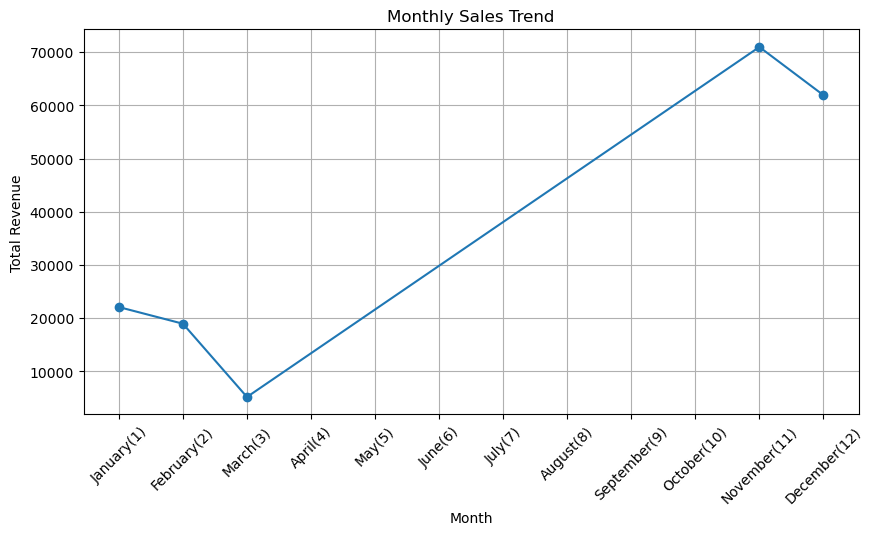

In [44]:
import matplotlib.pyplot as plt


month_names = ['January(1)', 'February(2)', 'March(3)', 'April(4)', 'May(5)', 'June(6)', 'July(7)', 'August(8)', 
               'September(9)', 'October(10)', 'November(11)', 'December(12)']
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'], monthly_sales['total_revenue'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)

In [45]:
def create_server_connection(hostname, user_name, password, database):
  connection = None
  try:
    connection = mysql.connector.connect(
        host = hostname,
        user = user_name,
        passwd = password,
        database = database
    )
    print("Connected Successfully")
  except Error as err:
    print(f"Connection Failed: {err}")
  return connection

In [46]:
connection = create_server_connection("localhost", os.environ.get('DB_USER'), os.environ.get('DB_PASSWORD'), "shop_ease")

Connected Successfully


In [47]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created Successfully")
    except Error as err:
        print(f"Error: '{err}'")

In [48]:
create_database_query = "CREATE DATABASE SHOP_EASE"
use_sales_data = "USE SHOP_EASE"

In [49]:
create_database(connection, create_database_query)

Error: '1007 (HY000): Can't create database 'shop_ease'; database exists'


In [50]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query was successful")
    except Error as err:
        print(f"Error: {err}")

In [51]:
execute_query(connection, use_sales_data)

Query was successful


In [52]:
sales_data.columns

Index(['order_id', 'customer_id', 'order_date', 'product_id', 'quantity',
       'product_name', 'category', 'price', 'customer_name', 'email',
       'join_date', 'year', 'month', 'day', 'total_revenue'],
      dtype='object')

In [53]:
cursor = connection.cursor()

In [ ]:

def insert_sales_data(sales_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO sales (customer_id, customer_name, email, join_date, order_id,
                                          order_date, product_id, quantity, product_name, category, 
                                          price, year, month, day, total_revenue)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in sales_data.iterrows():
                data_to_insert.append((
                    row['customer_id'], row['customer_name'], row['email'], row['join_date'], row['order_id'],
                    row['order_date'], row['product_id'], row['quantity'], row['product_name'], row['category'],
                    row['price'], row['year'], row['month'], row['day'], row['total_revenue']
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()



In [55]:
sales_data.shape

(570, 15)

In [56]:
sales_data

,order_id,customer_id,order_date,product_id,quantity,product_name,category,price,customer_name,email,join_date,year,month,day,total_revenue
0,1,20,2024-11-01,3,2,Tablet,Electronics,450.0,Tina Young,tina@example.com,2023-12-22,2024,11,1,900.0
1,2,36,2024-11-01,1,1,Laptop,Electronics,1200.0,James Walker,james@example.com,2023-10-09,2024,11,1,1200.0
2,3,1,2024-11-01,8,3,Headphones,Electronics,150.0,Alice Johnson,alice@example.com,2023-01-15,2024,11,1,450.0
3,4,36,2024-11-02,6,1,Smartwatch,Electronics,200.0,James Walker,james@example.com,2023-10-09,2024,11,2,200.0
4,5,14,2024-11-02,12,2,Desk,Furniture,300.0,Nina Mitchell,nina@example.com,2023-10-02,2024,11,2,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,666,41,2025-03-08,7,1,Camera,Electronics,650.0,Oscar Parker,oscar@example.com,2023-01-20,2025,3,8,650.0
566,667,5,2025-03-08,30,2,Tea,Food,3.5,Eve Parker,eve@example.com,2023-04-01,2025,3,8,7.0
567,668,16,2025-03-09,50,3,Jeans,Clothing,40.0,Paul Carter,paul@example.com,2023-11-01,2025,3,9,120.0
568,669,31,2025-03-09,19,1,Microwave,Home Appliances,150.0,Elena Hughes,elena@example.com,2023-07-26,2025,3,9,150.0


In [57]:
handle_missing_data(sales_data)

Missing Values in order_id: 0
No missing values in column: 'order_id'
Missing Values in customer_id: 0
No missing values in column: 'customer_id'
Missing Values in order_date: 0
No missing values in column: 'order_date'
Missing Values in product_id: 0
No missing values in column: 'product_id'
Missing Values in quantity: 0
No missing values in column: 'quantity'
Missing Values in product_name: 0
No missing values in column: 'product_name'
Missing Values in category: 0
No missing values in column: 'category'
Missing Values in price: 0
No missing values in column: 'price'
Missing Values in customer_name: 0
No missing values in column: 'customer_name'
Missing Values in email: 0
No missing values in column: 'email'
Missing Values in join_date: 0
No missing values in column: 'join_date'
Missing Values in year: 0
No missing values in column: 'year'
Missing Values in month: 0
No missing values in column: 'month'
Missing Values in day: 0
No missing values in column: 'day'
Missing Values in tota

In [58]:
handle_duplicated_values(sales_data)

Total duplicated rows: 0
No duplicated rows found


In [59]:
insert_sales_data(sales_data)

In [ ]:

def insert_customer_data(customer_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO customer (customer_id, customer_name, email, join_date)
            VALUES (%s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in customer_data.iterrows():
                data_to_insert.append((
                    row['customer_id'], row['customer_name'], row['email'], row['join_date']
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()



In [61]:
insert_customer_data(customer_data)

In [ ]:

def insert_inventory_data(inventory_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO inventory (product_name, stock_quantity, stock_date, supplier, warehouse_location)
            VALUES (%s, %s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in inventory_data.iterrows():
                data_to_insert.append((
                    row['product_name'], row['stock_quantity'], row['stock_date'], row['supplier'], row['warehouse_location']
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()


In [63]:
insert_inventory_data(inventory_data)

In [ ]:

def insert_order_items_data(order_items_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO order_items (order_detail_id,order_id,quantity,product_id)
            VALUES (%s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in order_items_data.iterrows():
                data_to_insert.append((
                    int(row['order_detail_id']), int(row['order_id']), int(row['quantity']), int(row['product_id'])
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()


In [76]:
insert_order_items_data(order_items_data)

In [ ]:

def insert_orders_data(orders_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO orders (order_id,customer_id,order_date,product_id,quantity)
            VALUES (%s, %s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in orders_data.iterrows():
                data_to_insert.append((
                    row['order_id'], row['customer_id'], row['order_date'], row['product_id'], row['quantity']
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()


In [67]:
insert_orders_data(orders_data)

In [68]:
orders_data.columns


Index(['order_id', 'customer_id', 'order_date', 'product_id', 'quantity'], dtype='object')

In [ ]:

def insert_products_data(products_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO products (product_id,product_name,category,price)
            VALUES (%s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in products_data.iterrows():
                data_to_insert.append((
                    row['product_id'], row['product_name'], row['category'], row['price']
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()


In [70]:
insert_products_data(products_data)

In [71]:
products_data.columns

Index(['product_id', 'product_name', 'category', 'price'], dtype='object')

In [ ]:

def insert_suppliers_data(suppliers_data):
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = """
            INSERT INTO suppliers (supplier_name,supplier_address,email,contact_number,fax,account_number,order_history,contract,supplier_country,supplier_city,country_code)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
            """
            data_to_insert = []

            for index, row in suppliers_data.iterrows():
                data_to_insert.append((
                    row['supplier_name'], row['supplier_address'], row['email'], row['contact_number'], row['fax'], row['account_number'], row['order_history'], row['contract'], row['supplier_country'],
                    row['supplier_city'], row['country_code']
                ))

            cursor.executemany(insert_query, data_to_insert)
            connection.commit()

    except Error as e:
        print(f"Error: {e}")
        connection.rollback()

    finally:
        if connection and connection.is_connected():
            cursor.close()


In [73]:
insert_suppliers_data(suppliers_data)